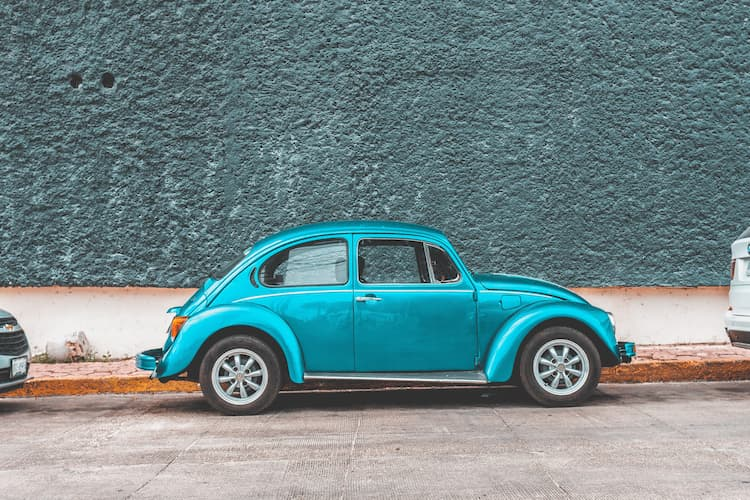

Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-15</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

`Project Instructions`


- Identify the single feature of the data that is the best predictor of whether a customer will put in a claim (the "outcome" column), excluding the "id" column.


- Store as a DataFrame called best_feature_df, containing columns named "best_feature" and "best_accuracy" with the name of the feature with the highest accuracy, and the respective accuracy score.

In [257]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit, ols
import matplotlib.pyplot as plt
import seaborn as sns

In [258]:
df = pd.read_csv('/Users/dani/Data Science/Projects/DataCamp Projects/Modeling Car Insurance Claim Outcomes/datasets/car_insurance.csv')

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [260]:
df.describe()

,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,10000.000000,10000.000000,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,1.489500,0.499000,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,1.025278,0.500024,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.000000,0.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,1.000000,0.000000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,1.000000,0.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,2.000000,1.000000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,3.000000,1.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [261]:
display(df)

df.driving_experience.value_counts()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,1,0,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,1,0,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,1,1,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,1,0,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


driving_experience
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: count, dtype: int64

`Note`

- Analysis would be considerably easier if we map the values back to their original categories. For the purpose of this project and its instructions, we will keep as-is

- Brief gives us numerical values for some of the categories while the DataFrame containts the categories themself (instead of the numerical encoding)

    Example of what we could use:

        - education_map = {'No education': 0, 'High school': 1, 'University': 2}

        - df['education_map'] = df['education'].map(education_map)

    Or run a function that encodes the columns we pass it to

The below was a test to examine the impact of encoding this categorical feature prior to running the model. No change as expected.

In [262]:
# driving_map = {'0-9y': 0, '10-19y': 1, '20-29y': 2, '30y+': 3}

# df['driving_experience'] = df['driving_experience'].map(driving_map)

# df.driving_experience.value_counts()

In [263]:
df['credit_score'].value_counts(dropna=False)

credit_score
NaN         982
0.428487      1
0.594531      1
0.396540      1
0.578306      1
           ... 
0.309272      1
0.847325      1
0.432080      1
0.527041      1
0.435225      1
Name: count, Length: 9019, dtype: int64

`Note`

A zero value should be fine this case is fine, the person might not actually have a credit score or has not started to accumulate any points (most likely due to age but other parameters should be considered)

In [264]:
df['annual_mileage'].value_counts(dropna=False)

annual_mileage
11000.0    1253
12000.0    1218
13000.0    1137
10000.0    1071
NaN         957
14000.0     894
9000.0      856
15000.0     632
8000.0      557
16000.0     419
7000.0      322
17000.0     246
6000.0      165
18000.0     103
5000.0       65
19000.0      48
4000.0       27
20000.0      13
3000.0       10
21000.0       3
2000.0        2
22000.0       2
Name: count, dtype: int64

In [265]:
mileage_df = df[df['annual_mileage'].isna()]

mileage_df.age.value_counts() # doesn't show much since count is spread out rather evenly

mileage_df.income.value_counts() # we see a higher count of upper class people with no recorded mileage

mileage_df.postal_code.value_counts() # a large portion of missing values come from zip code: 10238

mileage_df.vehicle_type.value_counts() # most missing values come from sedans

vehicle_type
sedan         915
sports car     42
Name: count, dtype: int64

In [266]:
credit_score_mean, mileage_mean = df['credit_score'].mean(), df['annual_mileage'].mean()

df['credit_score'].fillna(credit_score_mean, inplace=True)

df['annual_mileage'].fillna(mileage_mean, inplace=True)

# df.info() # check

`Note`

Missing values take up a small % of the total, we impute the mean for both columns

In [267]:
# fig = plt.figure(figsize=(12,6))

# sns.heatmap(df.corr(), annot=True)

# plt.show()

In [268]:
target = df['outcome']
features = df.drop(columns=['id', 'outcome']).columns

models = []
for col in features:
    '''Parsing through the columns in the features DF.
    For each column, we compute logistic regression compared to our 'outcome'.
    We append the results to our empty models list.
    '''
    model = logit(f"outcome ~ {col}", data=df).fit()
    models.append(model)

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5


Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.617345
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605716
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.621700
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.558922
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.598699
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.549220
         Iterations 7


In [269]:
accuracies = []

for i in range(0, len(models)):
    '''Parsing through the models list.
    Creating a confusion matrix for each set.
    Pulling out the actual and predicted values.
    Calculating the accuracy metric based on these values.
    Appending the result to our empty list.
    '''
    conf_matrix = models[i].pred_table()
    TN = conf_matrix[0,0]
    TP = conf_matrix[1,1]
    FN = conf_matrix[1,0]
    FP = conf_matrix[0,1]
    accuracy = (TN + TP) / (TN + FN + FP + TP)
    accuracies.append(accuracy)
    
print(accuracies)

[0.7747, 0.6867, 0.7771, 0.6867, 0.7425, 0.7054, 0.7351, 0.6867, 0.6867, 0.6867, 0.6867, 0.6904, 0.6867, 0.6867, 0.6867, 0.6867]


In [270]:
best_feature = features[accuracies.index(max(accuracies))] # finding the feature name

print(best_feature)

driving_experience


In [271]:
best_feature_df = pd.DataFrame({'best_feature': best_feature, 'best_accuracy': max(accuracies)}, index=[0]) # creating a DataFrame

display(best_feature_df)

,best_feature,best_accuracy
0,driving_experience,0.7771
